In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Dataset

In [25]:
df_train = pd.read_csv(r'C:\Users\SARVESH\Documents\GitHub\home-credit-default\modified.csv')

In [26]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,House / apartment
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment


In [27]:
df_train = df_train.drop(['SK_ID_CURR'], axis = 1)

# Fixing the Nan values in the Dataset

In [28]:
import seaborn as sns

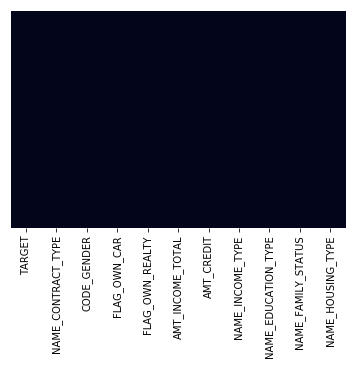

In [29]:
sns.heatmap(df_train.isnull(), yticklabels=False , cbar = False)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 11 columns):
TARGET                 19998 non-null int64
NAME_CONTRACT_TYPE     19998 non-null object
CODE_GENDER            19998 non-null object
FLAG_OWN_CAR           19998 non-null object
FLAG_OWN_REALTY        19998 non-null object
AMT_INCOME_TOTAL       19998 non-null float64
AMT_CREDIT             19998 non-null float64
NAME_INCOME_TYPE       19998 non-null object
NAME_EDUCATION_TYPE    19998 non-null object
NAME_FAMILY_STATUS     19998 non-null object
NAME_HOUSING_TYPE      19998 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 1.7+ MB


# Feature Engineering ---Handling Categorical Features

In [31]:
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].map(dict(Y=1,N=0))
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].map(dict(Y=1,N=0))

In [32]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,Cash loans,M,0,1,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment
1,0,Cash loans,F,0,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment
2,0,Revolving loans,M,1,1,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment
3,0,Cash loans,F,0,1,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment
4,0,Cash loans,M,0,1,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment


In [33]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False , dtype = int)
dt11 = df_train.T.to_dict().values()
nd = vec.fit_transform(dt11)
df_train = pd.DataFrame(nd,columns = vec.get_feature_names())
df_train.head()

,AMT_CREDIT,AMT_INCOME_TOTAL,CODE_GENDER=F,CODE_GENDER=M,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE=Cash loans,NAME_CONTRACT_TYPE=Revolving loans,NAME_EDUCATION_TYPE=Academic degree,NAME_EDUCATION_TYPE=Higher education,...,NAME_HOUSING_TYPE=Office apartment,NAME_HOUSING_TYPE=Rented apartment,NAME_HOUSING_TYPE=With parents,NAME_INCOME_TYPE=Commercial associate,NAME_INCOME_TYPE=Pensioner,NAME_INCOME_TYPE=State servant,NAME_INCOME_TYPE=Student,NAME_INCOME_TYPE=Unemployed,NAME_INCOME_TYPE=Working,TARGET
0,406597,202500,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1293502,270000,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,135000,67500,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,312682,135000,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,513000,121500,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df_train.columns

Index(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CODE_GENDER=F', 'CODE_GENDER=M',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE=Cash loans',
       'NAME_CONTRACT_TYPE=Revolving loans',
       'NAME_EDUCATION_TYPE=Academic degree',
       'NAME_EDUCATION_TYPE=Higher education',
       'NAME_EDUCATION_TYPE=Incomplete higher',
       'NAME_EDUCATION_TYPE=Lower secondary',
       'NAME_EDUCATION_TYPE=Secondary / secondary special',
       'NAME_FAMILY_STATUS=Civil marriage', 'NAME_FAMILY_STATUS=Married',
       'NAME_FAMILY_STATUS=Separated',
       'NAME_FAMILY_STATUS=Single / not married', 'NAME_FAMILY_STATUS=Widow',
       'NAME_HOUSING_TYPE=Co-op apartment',
       'NAME_HOUSING_TYPE=House / apartment',
       'NAME_HOUSING_TYPE=Municipal apartment',
       'NAME_HOUSING_TYPE=Office apartment',
       'NAME_HOUSING_TYPE=Rented apartment', 'NAME_HOUSING_TYPE=With parents',
       'NAME_INCOME_TYPE=Commercial associate', 'NAME_INCOME_TYPE=Pensioner',
       'NAME_INCOME_TYPE=St

# Feature Engineering --Handling Imbalanced Dataset

In [35]:
df_train['TARGET'].value_counts()

0    18420
1     1578
Name: TARGET, dtype: int64

In [36]:
from sklearn.utils import resample

In [37]:
#seperate majority and minority class
df_majority = df_train[df_train.TARGET == 0]
df_minority = df_train[df_train.TARGET == 1]

#Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                replace =True,
                                n_samples =18420,
                                random_state = 123)
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority ,df_minority_upsampled])

#Display the new class counts
df_upsampled.TARGET.value_counts()

1    18420
0    18420
Name: TARGET, dtype: int64

# Scaling the Data

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
df_test = df_upsampled.TARGET
df_train = df_upsampled.drop('TARGET' , axis = 1)

In [40]:
scaler = StandardScaler()
scaler.fit(df_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaled_data = scaler.transform(df_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [45]:
df_scale = pd.DataFrame(scaled_data)
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.908642,0.028363,0.795600,-0.795600,-0.706804,-1.490438,0.290391,-0.290391,-0.017282,1.977216,...,-0.196977,-0.083487,-0.134959,-0.250425,-0.53718,-0.423566,4.087975,-0.007368,-0.007368,-1.145189
1,-1.192285,-0.063838,-1.256914,1.256914,1.414818,0.670944,-3.443637,3.443637,-0.017282,-0.505762,...,-0.196977,-0.083487,-0.134959,-0.250425,-0.53718,-0.423566,-0.244620,-0.007368,-0.007368,0.873219
2,-0.716689,-0.033105,0.795600,-0.795600,-0.706804,0.670944,0.290391,-0.290391,-0.017282,-0.505762,...,-0.196977,-0.083487,-0.134959,-0.250425,-0.53718,-0.423566,-0.244620,-0.007368,-0.007368,0.873219
3,-0.180504,-0.039252,-1.256914,1.256914,-0.706804,0.670944,0.290391,-0.290391,-0.017282,-0.505762,...,-0.196977,-0.083487,-0.134959,-0.250425,-0.53718,-0.423566,-0.244620,-0.007368,-0.007368,0.873219
4,-0.240742,-0.049496,-1.256914,1.256914,-0.706804,0.670944,0.290391,-0.290391,-0.017282,-0.505762,...,-0.196977,-0.083487,-0.134959,-0.250425,-0.53718,-0.423566,4.087975,-0.007368,-0.007368,-1.145189


# Dimension Reduction Technique --PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components = 2)

In [48]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
x_pca = pca.transform(scaled_data)

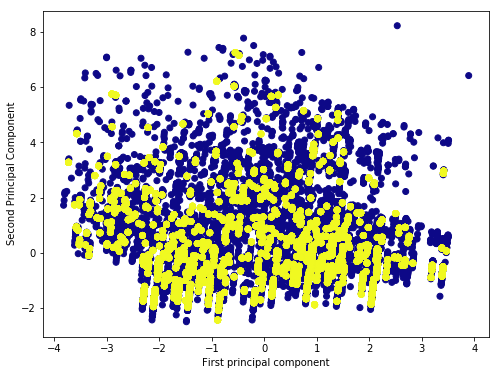

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_upsampled['TARGET'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

# Feature Selection - Univariate Selection

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [69]:
Xtrain , Xtest,ytrain ,ytest = train_test_split(df_train,df_test,random_state = 1)

In [70]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,ytrain)

In [71]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)

In [72]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [73]:
featureScores

,Specs,Score
0,AMT_CREDIT,-3.422416e+08
1,AMT_INCOME_TOTAL,1.346069e+10
2,CODE_GENDER=F,1.203926e+02
3,CODE_GENDER=M,1.923023e+02
4,FLAG_OWN_CAR,5.205321e+00
5,FLAG_OWN_REALTY,1.493732e+00
6,NAME_CONTRACT_TYPE=Cash loans,1.283879e+01
7,NAME_CONTRACT_TYPE=Revolving loans,1.558420e+02
8,NAME_EDUCATION_TYPE=Academic degree,7.036577e+00
9,NAME_EDUCATION_TYPE=Higher education,3.341575e+02


In [74]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                                Specs         Score
1                                    AMT_INCOME_TOTAL  1.346069e+10
9                NAME_EDUCATION_TYPE=Higher education  3.341575e+02
3                                       CODE_GENDER=M  1.923023e+02
25                         NAME_INCOME_TYPE=Pensioner  1.709322e+02
7                  NAME_CONTRACT_TYPE=Revolving loans  1.558420e+02
29                           NAME_INCOME_TYPE=Working  1.258556e+02
2                                       CODE_GENDER=F  1.203926e+02
26                     NAME_INCOME_TYPE=State servant  8.230269e+01
12  NAME_EDUCATION_TYPE=Secondary / secondary special  7.057588e+01
23                     NAME_HOUSING_TYPE=With parents  6.825243e+01


# Feature Importance

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [76]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[4.55673211e-01 3.26209332e-01 6.35139091e-03 1.00928658e-02
 2.63065025e-02 3.40523421e-02 5.23394529e-03 4.88182521e-03
 1.51333373e-04 1.20462797e-02 5.35270749e-03 2.98323823e-03
 8.90096967e-03 7.22163594e-03 1.04877501e-02 6.38437504e-03
 9.43683712e-03 5.10594287e-03 1.37300421e-03 9.22314263e-03
 6.44419687e-03 3.01891506e-03 3.48529407e-03 6.00797009e-03
 8.71223606e-03 7.92358797e-03 5.59245471e-03 5.73937602e-05
 1.59096703e-05 1.12734107e-02]


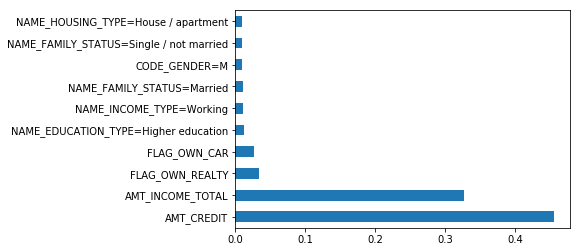

In [77]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xtrain.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [78]:
df_train = df_train[['AMT_CREDIT' , 'AMT_INCOME_TOTAL' ,'FLAG_OWN_REALTY' ,'FLAG_OWN_CAR',
                     'NAME_EDUCATION_TYPE=Higher education', 'NAME_INCOME_TYPE=Working',
                    'NAME_FAMILY_STATUS=Married','CODE_GENDER=M','NAME_FAMILY_STATUS=Single / not married',
                     'NAME_HOUSING_TYPE=House / apartment'
                    ]]

In [79]:
df_train.columns

Index(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR',
       'NAME_EDUCATION_TYPE=Higher education', 'NAME_INCOME_TYPE=Working',
       'NAME_FAMILY_STATUS=Married', 'CODE_GENDER=M',
       'NAME_FAMILY_STATUS=Single / not married',
       'NAME_HOUSING_TYPE=House / apartment'],
      dtype='object')

# Scaling

In [83]:
scaler = StandardScaler()
scaler.fit(df_train)
scaled_data = scaler.transform(df_train)
df_scale = pd.DataFrame(scaled_data)
df_scale.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9
0,1.908642,0.028363,-1.490438,-0.706804,1.977216,-1.145189,0.774821,-0.795600,-0.438180,0.378199
1,-1.192285,-0.063838,0.670944,1.414818,-0.505762,0.873219,-1.290621,1.256914,2.282168,0.378199
2,-0.716689,-0.033105,0.670944,-0.706804,-0.505762,0.873219,-1.290621,-0.795600,-0.438180,0.378199
3,-0.180504,-0.039252,0.670944,-0.706804,-0.505762,0.873219,-1.290621,1.256914,2.282168,0.378199
4,-0.240742,-0.049496,0.670944,-0.706804,-0.505762,-1.145189,0.774821,1.256914,-0.438180,0.378199


# Fitting with Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [86]:
df = pd.DataFrame(scaled_data)

In [89]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.908642,0.028363,-1.490438,-0.706804,1.977216,-1.145189,0.774821,-0.795600,-0.438180,0.378199
1,-1.192285,-0.063838,0.670944,1.414818,-0.505762,0.873219,-1.290621,1.256914,2.282168,0.378199
2,-0.716689,-0.033105,0.670944,-0.706804,-0.505762,0.873219,-1.290621,-0.795600,-0.438180,0.378199
3,-0.180504,-0.039252,0.670944,-0.706804,-0.505762,0.873219,-1.290621,1.256914,2.282168,0.378199
4,-0.240742,-0.049496,0.670944,-0.706804,-0.505762,-1.145189,0.774821,1.256914,-0.438180,0.378199


In [90]:
Xtrain , Xtest,ytrain ,ytest = train_test_split(df,df_test,random_state = 1)

In [91]:
Xtrain.shape

(27630, 10)

In [92]:
Xtest.shape

(9210, 10)

In [93]:
#train model
model= LogisticRegression()
model.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
y_model = model.predict(Xtest)

In [95]:
accuracy_score(ytest,y_model)

0.5906623235613464

# SVM Model

In [96]:
from sklearn.svm import SVC

In [97]:
clf = SVC(kernel = 'linear' , C=1E0)
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [98]:
y_model = clf.predict(Xtest)

In [99]:
accuracy_score(ytest , y_model)

0.5944625407166124

In [102]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_model)
cm

array([[2687, 1954],
       [1781, 2788]], dtype=int64)

# Applying Grid Search to find the best model and the best parameters 

In [109]:
''''from sklearn.model_selection import RandomizedSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
rand_search = RandomizedSearchCV(clf,
                           param_distributions= parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_iter = 5,
                           n_jobs = -1,
                           verbose=3)
grid_search = grid_search.fit(Xtrain, ytrain)''''

SyntaxError: EOL while scanning string literal (<ipython-input-109-3c3312ca53e9>, line 12)

# xgboost

In [110]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [111]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   15.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [112]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
       learning_rate=0.05, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [113]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [114]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.3, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1)

In [115]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,Xtest,ytest,cv=10)

In [116]:
score

array([0.82429501, 0.82301846, 0.81216069, 0.80021716, 0.81216069,
       0.80130293, 0.80564604, 0.80998914, 0.78067318, 0.80108696])

In [117]:
score.mean()

0.8070550262698888

#  Fitting Random Forest Regression to the dataset

In [118]:


from sklearn.ensemble import RandomForestClassifier
classifier  = RandomForestClassifier(n_estimators = 10, random_state = 0)

classifier.fit(Xtrain, ytrain)
y_pred = classifier.predict(Xtest)
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,Xtest,ytest,cv=10)
score

array([0.85140998, 0.86753529, 0.86427796, 0.84690554, 0.84364821,
       0.8577633 , 0.8534202 , 0.86210641, 0.84256243, 0.83804348])

In [119]:
score.mean()

0.8527672783387571

In [123]:
params={'max_depth':[3,5,10,None],

              'n_estimators':[10,100,200,300,400,500],

              'max_features':[1,3],

               'criterion':['gini','entropy'],

               'bootstrap':[True,False],

               'min_samples_leaf':[1,4],

              }

In [124]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   11.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': [1, 3], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'min_samples_leaf': [1, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [125]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [126]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [129]:
classifier  = RandomForestClassifier(n_estimators = 100,
                                     min_samples_leaf = 1,
                                     max_features =  3,
                                     max_depth = None,
                                     criterion = 'entropy',
                                     bootstrap = False)

classifier.fit(Xtrain, ytrain)
y_pred = classifier.predict(Xtest)
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,Xtest,ytest,cv=10)
score

array([0.87744035, 0.88165038, 0.86862106, 0.86427796, 0.86210641,
       0.8762215 , 0.87947883, 0.87947883, 0.87187839, 0.85869565])

In [130]:
score.mean()

0.8719849354294356